# Resources
## Instructor Name:- Santiago Basulto
## Channel:- [Freecodecamp](https://www.youtube.com/watch?v=gtjxAH8uaP0)
## Resource Link:- [Youtube](https://youtu.be/gtjxAH8uaP0?t=8657)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

In [41]:
df = pd.read_csv('googleplaystore.csv')
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3194,BI-LO Rx,lifestyle,3.9,77,Varies with device,"10,000+",Free,0,Everyone,Lifestyle,"March 26, 2018",Varies with device,Varies with device
2118,An Elite Warrior Ex,game,4.7,15,93M,100+,Paid,$0.99,Everyone,Adventure,"November 21, 2016",1.59,4.0.3 and up
4626,Walking for Weight Loss - Walk Tracker,health_and_fitness,4.5,644,5.5M,"100,000+",Free,0,Everyone,Health & Fitness,"July 25, 2018",1.0.4,4.1 and up
9430,Six Pack in 30 Days - Abs Workout,health_and_fitness,4.9,272337,13M,"10,000,000+",Free,0,Everyone,Health & Fitness,"June 21, 2018",1.0.2,4.2 and up
691,BU Beauty Rooms,beauty,NaN,1,6.0M,50+,Free,0,Everyone,Beauty,"February 17, 2017",1,4.4 and up


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Data Cleaning

##### 1. Which of the following column(s) has/have null values?

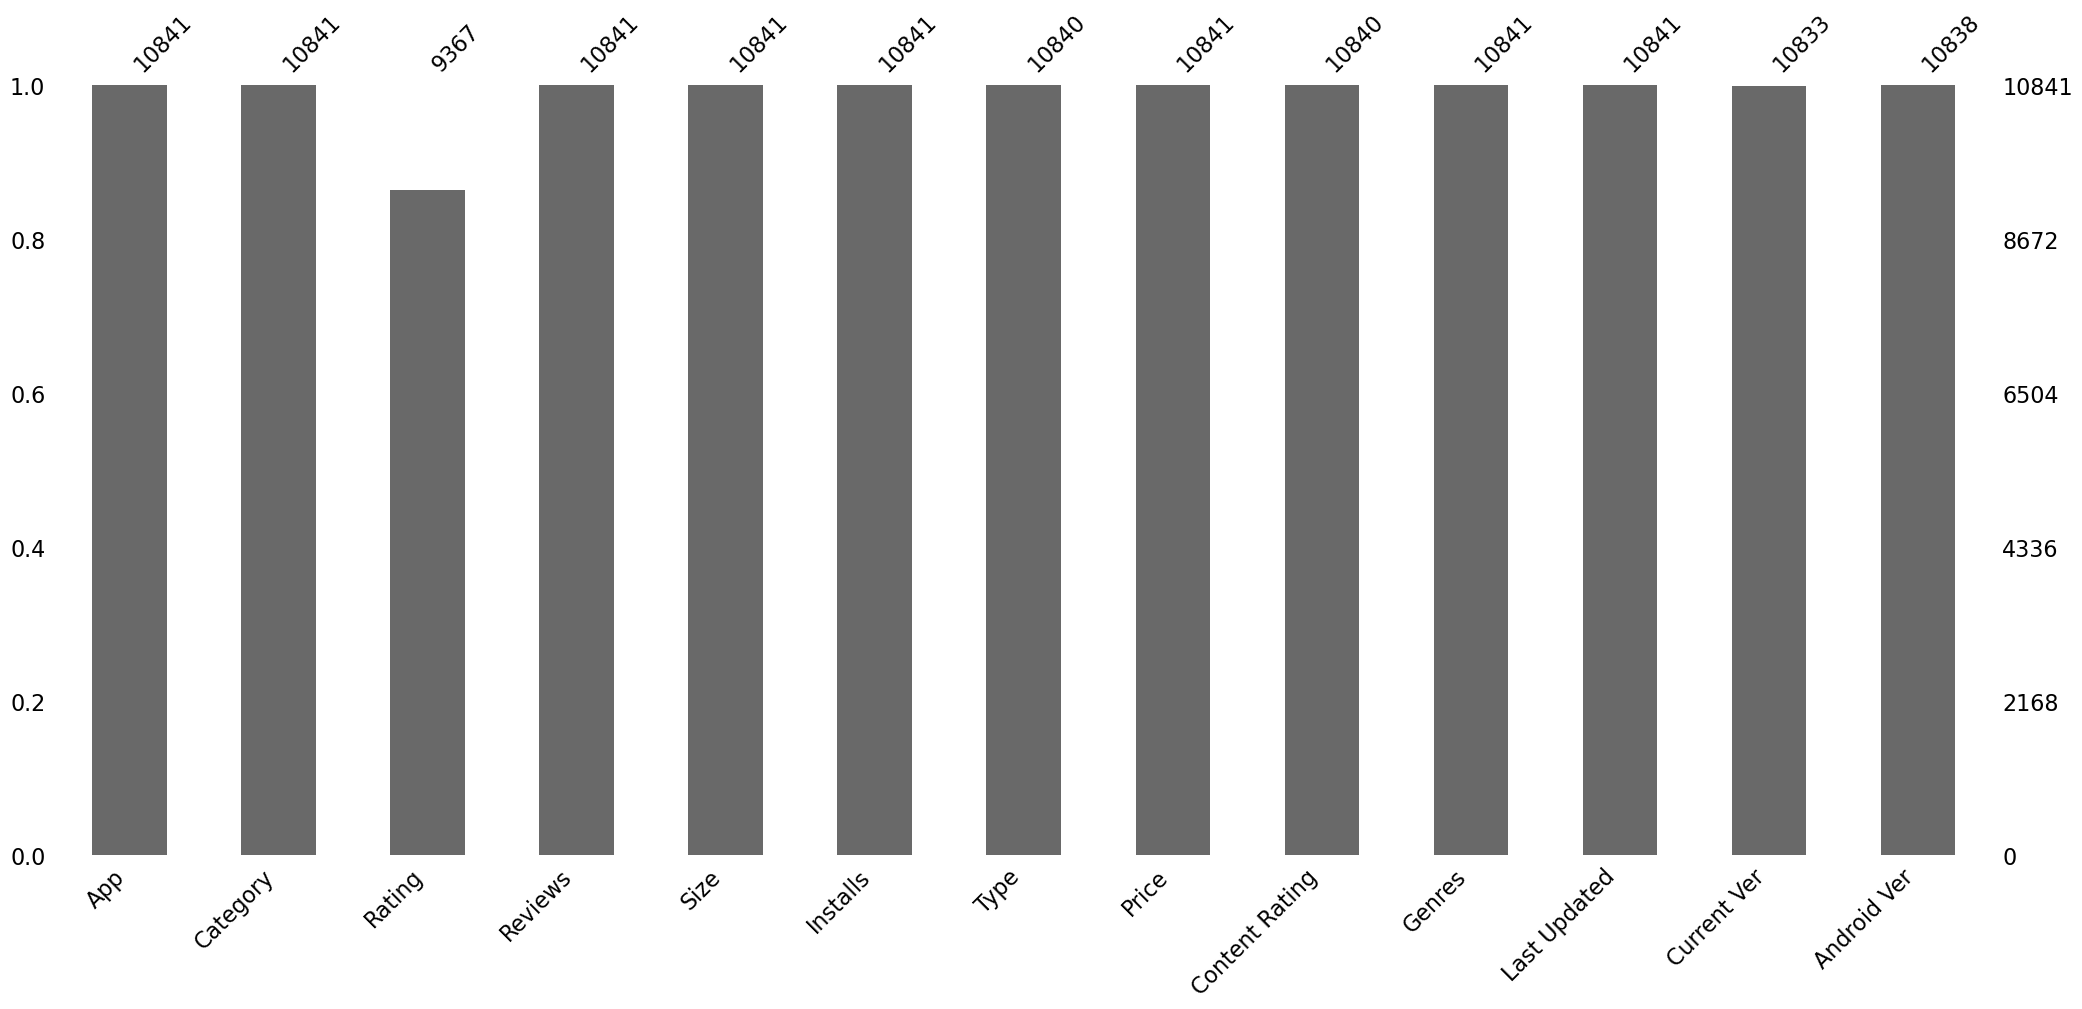

In [7]:
msno.bar(df);

In [8]:
df.isna().sum().sort_values(ascending=False)

Rating            1474
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Genres               0
Last Updated         0
dtype: int64

##### 2. Clean the `Rating` column and the other columns containing null values

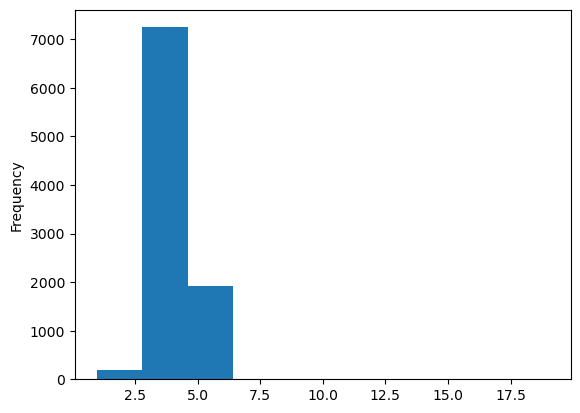

In [10]:
df['Rating'].plot(kind='hist');

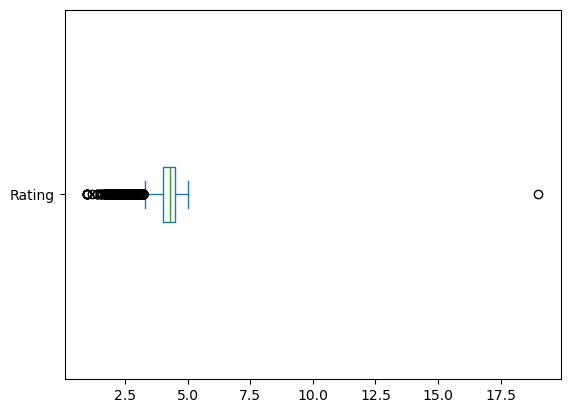

In [13]:
df['Rating'].plot(kind='box', vert=False);

In [12]:
df['Rating'].describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

In [14]:
df.loc[df['Rating'] > 5, 'Rating'] = np.nan

In [15]:
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

In [16]:
df.dropna(inplace=True)

In [17]:
df.isna().sum().sort_values(ascending=False)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

##### 3. Clean the column `Reviews` and make it numeric

In [18]:
df['Reviews Numeric'] = pd.to_numeric(df['Reviews'], errors = 'coerce')

In [19]:
df.loc[df['Reviews Numeric'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews Numeric


In [26]:
df.loc[df['Reviews'].str.contains('M'), 'Reviews']

Series([], Name: Reviews, dtype: object)

In [30]:
df['Reviews'] = pd.to_numeric(df['Reviews'])

##### 4. How many duplicated apps are there?

In [37]:
df.loc[df.duplicated(subset=['App'])].sort_values(by='App')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews Numeric
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,2490
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,23160
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,12
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15M,"100,000+",Free,0,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up,11506
5415,365Scores - Live Scores,SPORTS,4.6,666246,25M,"10,000,000+",Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up,666246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,34M,"10,000,000+",Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up,133833
3014,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133825,34M,"10,000,000+",Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up,133825
3202,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device,219848
3118,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device,219848


In [38]:
df[df.duplicated(subset=['App'])].sort_values(by='App')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews Numeric
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,2490
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,23160
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,12
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15M,"100,000+",Free,0,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up,11506
5415,365Scores - Live Scores,SPORTS,4.6,666246,25M,"10,000,000+",Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up,666246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,34M,"10,000,000+",Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up,133833
3014,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133825,34M,"10,000,000+",Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up,133825
3202,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device,219848
3118,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device,219848


##### 5. Drop duplicated apps keeping the ones with the greatest number of reviews

##### 6. Format the `Category` column

In [43]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Truth or Dare Pro,dating,NaN,0,20M,50+,Paid,$1.49,Teen,Dating,"September 1, 2017",1,4.0 and up
1,"Private Dating, Hide App- Blue for PrivacyHider",dating,NaN,0,18k,100+,Paid,$2.99,Everyone,Dating,"July 25, 2017",1.0.1,4.0 and up


In [44]:
df['Category'].value_counts()

Category
family                 1972
game                   1144
tools                   843
medical                 463
business                460
productivity            424
personalization         392
communication           387
sports                  384
lifestyle               382
finance                 366
health_and_fitness      341
photography             335
social                  295
news_and_magazines      283
shopping                260
travel_and_local        258
dating                  234
books_and_reference     231
video_players           175
education               156
entertainment           149
maps_and_navigation     137
food_and_drink          127
house_and_home           88
libraries_and_demo       85
auto_and_vehicles        85
weather                  82
art_and_design           65
events                   64
comics                   60
parenting                60
beauty                   53
1.9                       1
Name: count, dtype: int64

In [45]:
df['Category'] = df['Category'].str.replace('_',' ')

In [46]:
df['Category'].value_counts()

Category
family                 1972
game                   1144
tools                   843
medical                 463
business                460
productivity            424
personalization         392
communication           387
sports                  384
lifestyle               382
finance                 366
health and fitness      341
photography             335
social                  295
news and magazines      283
shopping                260
travel and local        258
dating                  234
books and reference     231
video players           175
education               156
entertainment           149
maps and navigation     137
food and drink          127
house and home           88
libraries and demo       85
auto and vehicles        85
weather                  82
art and design           65
events                   64
comics                   60
parenting                60
beauty                   53
1.9                       1
Name: count, dtype: int64

In [47]:
df['Category'] = df['Category'].str.capitalize()

In [48]:
df['Category'].value_counts()

Category
Family                 1972
Game                   1144
Tools                   843
Medical                 463
Business                460
Productivity            424
Personalization         392
Communication           387
Sports                  384
Lifestyle               382
Finance                 366
Health and fitness      341
Photography             335
Social                  295
News and magazines      283
Shopping                260
Travel and local        258
Dating                  234
Books and reference     231
Video players           175
Education               156
Entertainment           149
Maps and navigation     137
Food and drink          127
House and home           88
Libraries and demo       85
Auto and vehicles        85
Weather                  82
Art and design           65
Events                   64
Comics                   60
Parenting                60
Beauty                   53
1.9                       1
Name: count, dtype: int64

##### 7. Clean and convert the `Installs` column to numeric type

In [50]:
df.loc[pd.to_numeric(df['Installs'], errors='coerce').isna()].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Truth or Dare Pro,Dating,NaN,0,20M,50+,Paid,$1.49,Teen,Dating,"September 1, 2017",1,4.0 and up
1,"Private Dating, Hide App- Blue for PrivacyHider",Dating,NaN,0,18k,100+,Paid,$2.99,Everyone,Dating,"July 25, 2017",1.0.1,4.0 and up
2,Dating White Girls,Dating,NaN,0,3.6M,50+,Free,0,Mature 17+,Dating,"July 20, 2018",1,4.0 and up
3,Geeks Dating,Dating,NaN,0,13M,50+,Free,0,Mature 17+,Dating,"July 10, 2018",1,4.1 and up
4,CAM5678 Video Chat,Dating,NaN,0,39M,500+,Free,0,Mature 17+,Dating,"July 13, 2018",5.5.8,4.0.3 and up


##### 8. Clean and convert the `Size` column to numeric (representing bytes)

##### 9. Clean and convert the `Price` column to numeric

##### 10. Paid or free?

### Analysis

##### 11. Which app has the most reviews?

##### 12. What category has the highest number of apps uploaded to the store?

##### 13. To which category belongs the most expensive app?

##### 14. What's the name of the most expensive game?

##### 15. Which is the most popular Finance App?

##### 16. What *Teen* Game has the most reviews?

##### 17. Which is the free game with the most reviews?

##### 18. How many TB (terabytes) were transferred (overall) for the most popular Lifestyle app?